# Logistic Regression

### 1. Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)
pd.set_option("max_colwidth", None)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
##### 载入Data Preparation 导入各个 X&Y 文件
X_train_basic = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_train_basic.npy")
X_train_freq = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_train_freq.npy")
X_train_ite = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_train_ite.npy")
y_train = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/y_train.npy")
X_test_basic = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_test_basic.npy")
X_test_freq = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_test_freq.npy")
X_test_ite = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/X_test_ite.npy")
y_test = np.load("/Users/fanjia_imac27/Desktop/#Python Practice#/【IDAB - Group】/4-【Jiawei】/20201031 - 操作/npy/y_test.npy")

In [3]:
##### 看看data
a = pd.DataFrame(X_train_freq)
a.shape

(32950, 34)

### 2. Create "Report" 

In [4]:
report = pd.DataFrame(columns=['Model',
    'Acc.Train','Mean Acc.Train','Std Acc',
    'APS.Train','Mean APS.Train','Std APS',
    'Acc.Test','APS.Test'])
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test


### 3. [原始] Apply Logistic Model

In [5]:
#### 用freq组数据fit ---- lrmodel_ori
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
lrmodel_ori = LogisticRegression()
lrmodel_ori.fit(X_train_freq, y_train)
y_train_pred = lrmodel_ori.predict(X_train_freq)
#### 测model表现
cmtr = confusion_matrix(y_train, y_train_pred)
acctr = accuracy_score(y_train, y_train_pred)
aps_train = average_precision_score(y_train, y_train_pred)
print('Confusion Matrix:\n',cmtr,'\nAccuracy Score:\n',acctr, '\n APS:\n',aps_train)

Confusion Matrix:
 [[28845   393]
 [ 2911   801]] 
Accuracy Score:
 0.8997268588770865 
 APS:
 0.2331073665134447


In [6]:
#### 用freq组数据test ---- lrmodel_ori
lrmodel_ori.fit(X_test_freq, y_test)
y_test_pred = lrmodel_ori.predict(X_test_freq)
#### 测model表现
cmte = confusion_matrix(y_test, y_test_pred)
accte = accuracy_score(y_test, y_test_pred)
aps_test = average_precision_score(y_test, y_test_pred)
print('Confusion Matrix:\n',cmte,'\nAccuracy Score:\n',accte, '\nAPS:\n',aps_test)

Confusion Matrix:
 [[7198  112]
 [ 699  229]] 
Accuracy Score:
 0.9015537751881525 
APS:
 0.2505682821673084


In [7]:
report.loc[len(report)] =['Logistic_ori',
    acctr,'-','-',
    aps_train,'-','-',
    accte,aps_test]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568


### 4. [原始] Cross Validation

In [8]:
#### 用freq组数据cross validation ---- lrmodel_ori_cv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.model_selection import cross_val_score
lrmodel_ori_cv = LogisticRegression()
CV_acc = cross_val_score(lrmodel_ori_cv, X_train_freq, y_train, scoring='accuracy', cv=10)
CV_aps = cross_val_score(lrmodel_ori_cv, X_train_freq, y_train, scoring='average_precision', cv=10)

print('CV Accuracy:\n',CV_acc, CV_acc.mean(),
      '\nCV APS:\n', CV_aps, CV_aps.mean())

CV Accuracy:
 [0.90227618 0.90075873 0.90349014 0.90045524 0.89681335 0.89438543
 0.89802731 0.90106222 0.9016692  0.89650986] 0.8995447647951442 
CV APS:
 [0.47510658 0.44186227 0.47111042 0.40407408 0.41978604 0.43680969
 0.40185251 0.45758929 0.45209975 0.43603842] 0.43963290341688416


In [9]:
#### 用test组测试cross validation后的模型 ---- lrmodel_ori_cv
lrmodel_ori_cv.fit(X_test_freq, y_test)
y_test_pred = lrmodel_ori_cv.predict(X_test_freq)
cmte_cv = confusion_matrix(y_test, y_test_pred)
accte_cv = accuracy_score(y_test, y_test_pred)
aps_test_cv = average_precision_score(y_test, y_test_pred)
print('Confusion Matrix:\n',cmte_cv,'\nAccuracy Score:\n',accte_cv, '\nAPSe:\n',aps_test_cv)

Confusion Matrix:
 [[7198  112]
 [ 699  229]] 
Accuracy Score:
 0.9015537751881525 
APSe:
 0.2505682821673084


In [10]:
report.loc[len(report)] =['Logistic_ori_CV',
    '-', CV_acc.mean(), CV_acc.std(),
    '-', CV_aps.mean(), CV_aps.std(),
     accte_cv, aps_test_cv]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568
1,Logistic_ori_CV,-,0.899545,0.00278815,-,0.439633,0.0241632,0.901554,0.250568


### 5. [原始] Grid Search

In [11]:
#### 用freq组数据Grid Search ---- lrmodel_ori_gs  【尝试-1】
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
lrmodel_ori_gs = LogisticRegression()

#### 使用Grid Search
param_grid = {'penalty': ['l1', 'l2'],
              'C':[0.001,.009,0.01,.09,1,5,10,25]}
GS_lrmodel_1 = GridSearchCV(lrmodel_ori_gs, param_grid, scoring='recall')
GS_lrmodel_1.fit(X_train_freq, y_train)
lrmodel_ori_gs1 = lrmodel_ori_gs.set_params(**GS_lrmodel_1.best_params_)

#### 测model表现： train组
lrmodel_ori_gs1.fit(X_train_freq, y_train)
y_train_pred = lrmodel_ori_gs1.predict(X_train_freq)
cmtr_gs1 = confusion_matrix(y_train, y_train_pred)
acctr_gs1 = accuracy_score(y_train, y_train_pred)
aps_train_gs1 = average_precision_score(y_train, y_train_pred)
#### 测model表现： test组
lrmodel_ori_gs1.fit(X_test_freq, y_test)
y_test_pred = lrmodel_ori_gs1.predict(X_test_freq)
cmte_gs1 = confusion_matrix(y_test, y_test_pred)
accte_gs1 = accuracy_score(y_test, y_test_pred)
aps_test_gs1 = average_precision_score(y_test, y_test_pred)

print('Confusion Matrix:\n',cmtr_gs1,'\nAccuracy Score:\n',acctr_gs1, '\nAPS:\n',aps_train_gs1)
print('Confusion Matrix:\n',cmte_gs1,'\nAccuracy Score:\n',accte_gs1, '\nAPS:\n',aps_test_gs1)
print('best parameters:',GS_lrmodel_1.best_params_)

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

Confusion Matrix:
 [[28842   396]
 [ 2910   802]] 
Accuracy Score:
 0.8996661608497724 
APS:
 0.2329541436445145
Confusion Matrix:
 [[7192  118]
 [ 698  230]] 
Accuracy Score:
 0.9009468317552805 
APS:
 0.24853479272557008
best parameters: {'C': 10, 'penalty': 'l2'}


In [13]:
#### 用freq组数据Grid Search ---- lrmodel_ori_gs  【尝试-2】
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
lrmodel_ori_gs = LogisticRegression()

#### 使用Grid Search
param_grid = {"C":np.logspace(-3,3,7), 
              "penalty":["l1","l2"]}
GS_lrmodel_2 = GridSearchCV(lrmodel_ori_gs, param_grid, cv=10)
GS_lrmodel_2.fit(X_train_freq, y_train)
lrmodel_ori_gs2 = lrmodel_ori_gs.set_params(**GS_lrmodel_2.best_params_)

#### 测model表现： train组
lrmodel_ori_gs2.fit(X_train_freq, y_train)
y_train_pred = lrmodel_ori_gs2.predict(X_train_freq)
cmtr_gs2 = confusion_matrix(y_train, y_train_pred)
acctr_gs2 = accuracy_score(y_train, y_train_pred)
aps_train_gs2 = average_precision_score(y_train, y_train_pred)
#### 测model表现： test组
lrmodel_ori_gs2.fit(X_test_freq, y_test)
y_test_pred = lrmodel_ori_gs2.predict(X_test_freq)
cmte_gs2 = confusion_matrix(y_test, y_test_pred)
accte_gs2 = accuracy_score(y_test, y_test_pred)
aps_test_gs2 = average_precision_score(y_test, y_test_pred)

print('Confusion Matrix:\n',cmtr_gs2,'\nAccuracy Score:\n',acctr_gs2, '\nAPS:\n',aps_train_gs2)
print('Confusion Matrix:\n',cmte_gs2,'\nAccuracy Score:\n',accte_gs2, '\nAPS:\n',aps_test_gs2)
print('best parameters:',GS_lrmodel_2.best_params_)

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

Confusion Matrix:
 [[28848   390]
 [ 2911   801]] 
Accuracy Score:
 0.8998179059180577 
APS:
 0.2334720047697615
Confusion Matrix:
 [[7213   97]
 [ 710  218]] 
Accuracy Score:
 0.9020393299344501 
APS:
 0.2487612274568851
best parameters: {'C': 0.1, 'penalty': 'l2'}


In [14]:
report.loc[len(report)] =['Logistic_ori_GS1',
    acctr_gs1, '-', '-',
    aps_train_gs1, '-', '-',
    accte_gs1, aps_test_gs1]
report.loc[len(report)] =['Logistic_ori_GS2',
    acctr_gs2, '-', '-',
    aps_train_gs2, '-', '-',
    accte_gs2, aps_test_gs2]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568
1,Logistic_ori_CV,-,0.899545,0.00278815,-,0.439633,0.0241632,0.901554,0.250568
2,Logistic_ori_GS1,0.899666,-,-,0.232954,-,-,0.900947,0.248535
3,Logistic_ori_GS2,0.899818,-,-,0.233472,-,-,0.902039,0.248761


### 7. [Balanced]重新使用Logistic

In [15]:
#### 用freq组数据fit ---- lrmodel_bal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
lrmodel_bal = LogisticRegression(class_weight='balanced')
lrmodel_bal.fit(X_train_freq, y_train)
y_train_pred = lrmodel_bal.predict(X_train_freq)
#### 测model表现
cmtr = confusion_matrix(y_train, y_train_pred)
acctr = accuracy_score(y_train, y_train_pred)
aps_train = average_precision_score(y_train, y_train_pred)

#### 用freq组数据test ---- lrmodel_bal
lrmodel_bal.fit(X_test_freq, y_test)
y_test_pred = lrmodel_bal.predict(X_test_freq)
#### 测model表现
cmte = confusion_matrix(y_test, y_test_pred)
accte = accuracy_score(y_test, y_test_pred)
aps_test = average_precision_score(y_test, y_test_pred)

print('Confusion Matrix:\n',cmtr,'\nAccuracy Score:\n',acctr, '\nAPS:\n',aps_train)
print('Confusion Matrix:\n',cmte,'\nAccuracy Score:\n',accte, '\nAPS:\n',aps_test)

Confusion Matrix:
 [[23957  5281]
 [ 1316  2396]] 
Accuracy Score:
 0.7997875569044006 
APS:
 0.24139247827628868
Confusion Matrix:
 [[5966 1344]
 [ 299  629]] 
Accuracy Score:
 0.8005583879582423 
APS:
 0.2523810178345369


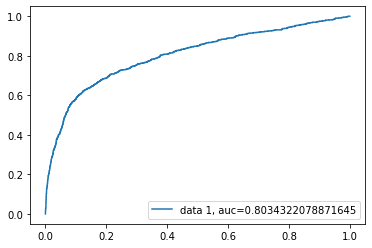

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred_proba = lrmodel_bal.predict_proba(X_test_freq)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
report.loc[len(report)] =['Logistic_bal',
    acctr,'-','-',
    aps_train,'-','-',
    accte,aps_test]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568
1,Logistic_ori_CV,-,0.899545,0.00278815,-,0.439633,0.0241632,0.901554,0.250568
2,Logistic_ori_GS1,0.899666,-,-,0.232954,-,-,0.900947,0.248535
3,Logistic_ori_GS2,0.899818,-,-,0.233472,-,-,0.902039,0.248761
4,Logistic_bal,0.799788,-,-,0.241392,-,-,0.800558,0.252381


### 8. [Balanced] Cross Validation

In [18]:
#### 用freq组数据cross validation ---- lrmodel_bal_cv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.model_selection import cross_val_score
lrmodel_bal_cv = LogisticRegression(class_weight='balanced')
CV_acc = cross_val_score(lrmodel_bal_cv, X_train_freq, y_train, scoring='accuracy', cv=10)
CV_aps = cross_val_score(lrmodel_bal_cv, X_train_freq, y_train, scoring='average_precision', cv=10)

#### 用test组测试cross validation后的模型 ---- lrmodel_ori_cv
lrmodel_bal_cv.fit(X_test_freq, y_test)
y_test_pred = lrmodel_bal_cv.predict(X_test_freq)
cmte_cv = confusion_matrix(y_test, y_test_pred)
accte_cv = accuracy_score(y_test, y_test_pred)
aps_test_cv = average_precision_score(y_test, y_test_pred)

print('CV Accuracy:\n',CV_acc, CV_acc.mean(),
      '\nCV aps:\n', CV_aps, CV_aps.mean())
print('Confusion Matrix:\n',cmte_cv,'\nAccuracy Score:\n',accte_cv, '\nAPS:\n',aps_test_cv)

CV Accuracy:
 [0.80880121 0.80940819 0.79757208 0.80182094 0.80576631 0.77329287
 0.79362671 0.8091047  0.80242792 0.79332322] 0.7995144157814871 
CV aps:
 [0.47375142 0.43927872 0.46742462 0.39678892 0.41756263 0.43049923
 0.40444053 0.45462875 0.44724987 0.42297161] 0.4354596301575551
Confusion Matrix:
 [[5966 1344]
 [ 299  629]] 
Accuracy Score:
 0.8005583879582423 
APS:
 0.2523810178345369


In [19]:
report.loc[len(report)] =['Logistic_bal_CV',
    '-', CV_acc.mean(), CV_acc.std(),
    '-', CV_aps.mean(), CV_aps.std(),
     accte_cv, aps_test_cv]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568
1,Logistic_ori_CV,-,0.899545,0.00278815,-,0.439633,0.0241632,0.901554,0.250568
2,Logistic_ori_GS1,0.899666,-,-,0.232954,-,-,0.900947,0.248535
3,Logistic_ori_GS2,0.899818,-,-,0.233472,-,-,0.902039,0.248761
4,Logistic_bal,0.799788,-,-,0.241392,-,-,0.800558,0.252381
5,Logistic_bal_CV,-,0.799514,0.0104563,-,0.43546,0.0244285,0.800558,0.252381


### 9. [Balanced] Grid Search


In [20]:
#### 用freq组数据Grid Search ---- lrmodel_bal_gs  【尝试-1】
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
lrmodel_bal_gs = LogisticRegression(class_weight='balanced')

#### 使用Grid Search
param_grid = {'penalty': ['l1', 'l2'],
              'C':[0.001,.009,0.01,.09,1,5,10,25]}
GS_lrmodel_1 = GridSearchCV(lrmodel_bal_gs, param_grid, scoring='recall')
GS_lrmodel_1.fit(X_train_freq, y_train)
lrmodel_bal_gs1 = lrmodel_bal_gs.set_params(**GS_lrmodel_1.best_params_)

#### 测model表现： train组
lrmodel_bal_gs1.fit(X_train_freq, y_train)
y_train_pred = lrmodel_bal_gs1.predict(X_train_freq)
cmtr_gs1 = confusion_matrix(y_train, y_train_pred)
acctr_gs1 = accuracy_score(y_train, y_train_pred)
aps_train_gs1 = average_precision_score(y_train, y_train_pred)
#### 测model表现： test组
lrmodel_bal_gs1.fit(X_test_freq, y_test)
y_test_pred = lrmodel_bal_gs1.predict(X_test_freq)
cmte_gs1 = confusion_matrix(y_test, y_test_pred)
accte_gs1 = accuracy_score(y_test, y_test_pred)
aps_test_gs1 = average_precision_score(y_test, y_test_pred)

print('Confusion Matrix:\n',cmtr_gs1,'\nAccuracy Score:\n',acctr_gs1, '\nAPS:\n',aps_train_gs1)
print('Confusion Matrix:\n',cmte_gs1,'\nAccuracy Score:\n',accte_gs1, '\nAPS:\n',aps_test_gs1)
print('best parameters:',GS_lrmodel_1.best_params_)

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

Confusion Matrix:
 [[22726  6512]
 [ 1197  2515]] 
Accuracy Score:
 0.7660394537177542 
APS:
 0.22509411518546124
Confusion Matrix:
 [[5548 1762]
 [ 257  671]] 
Accuracy Score:
 0.7549162418062637 
APS:
 0.230610575712801
best parameters: {'C': 0.001, 'penalty': 'l2'}


In [21]:
#### 用freq组数据Grid Search ---- lrmodel_bal_gs  【尝试-2】
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
lrmodel_bal_gs = LogisticRegression(class_weight='balanced')

#### 使用Grid Search
param_grid = {"C":np.logspace(-3,3,7), 
              "penalty":["l1","l2"]}
GS_lrmodel_2 = GridSearchCV(lrmodel_bal_gs, param_grid, cv=10)
GS_lrmodel_2.fit(X_train_freq, y_train)
lrmodel_bal_gs2 = lrmodel_bal_gs.set_params(**GS_lrmodel_2.best_params_)

#### 测model表现： train组
lrmodel_bal_gs2.fit(X_train_freq, y_train)
y_train_pred = lrmodel_bal_gs2.predict(X_train_freq)
cmtr_gs2 = confusion_matrix(y_train, y_train_pred)
acctr_gs2 = accuracy_score(y_train, y_train_pred)
aps_train_gs2 = average_precision_score(y_train, y_train_pred)
#### 测model表现： test组
lrmodel_bal_gs2.fit(X_test_freq, y_test)
y_test_pred = lrmodel_bal_gs2.predict(X_test_freq)
cmte_gs2 = confusion_matrix(y_test, y_test_pred)
accte_gs2 = accuracy_score(y_test, y_test_pred)
aps_test_gs2 = average_precision_score(y_test, y_test_pred)

print('Confusion Matrix:\n',cmtr_gs2,'\nAccuracy Score:\n',acctr_gs2, '\nAPS:\n',aps_train_gs2)
print('Confusion Matrix:\n',cmte_gs2,'\nAccuracy Score:\n',accte_gs2, '\nAPS:\n',aps_test_gs2)
print('best parameters:',GS_lrmodel_2.best_params_)

/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/fanjia_imac27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

Confusion Matrix:
 [[23975  5263]
 [ 1320  2392]] 
Accuracy Score:
 0.8002124430955994 
APS:
 0.2414188367241316
Confusion Matrix:
 [[5982 1328]
 [ 299  629]] 
Accuracy Score:
 0.8025006069434328 
APS:
 0.25414768763973905
best parameters: {'C': 100.0, 'penalty': 'l2'}


In [22]:
report.loc[len(report)] =['Logistic_bal_GS1',
    acctr_gs1, '-', '-',
    aps_train_gs1, '-', '-',
    accte_gs1, aps_test_gs1]
report.loc[len(report)] =['Logistic_bal_GS2',
    acctr_gs2, '-', '-',
    aps_train_gs2, '-', '-',
    accte_gs2, aps_test_gs2]
report

,Model,Acc.Train,Mean Acc.Train,Std Acc,APS.Train,Mean APS.Train,Std APS,Acc.Test,APS.Test
0,Logistic_ori,0.899727,-,-,0.233107,-,-,0.901554,0.250568
1,Logistic_ori_CV,-,0.899545,0.00278815,-,0.439633,0.0241632,0.901554,0.250568
2,Logistic_ori_GS1,0.899666,-,-,0.232954,-,-,0.900947,0.248535
3,Logistic_ori_GS2,0.899818,-,-,0.233472,-,-,0.902039,0.248761
4,Logistic_bal,0.799788,-,-,0.241392,-,-,0.800558,0.252381
5,Logistic_bal_CV,-,0.799514,0.0104563,-,0.43546,0.0244285,0.800558,0.252381
6,Logistic_bal_GS1,0.766039,-,-,0.225094,-,-,0.754916,0.230611
7,Logistic_bal_GS2,0.800212,-,-,0.241419,-,-,0.802501,0.254148


### 10. Describe [Balanced] Logistic Model
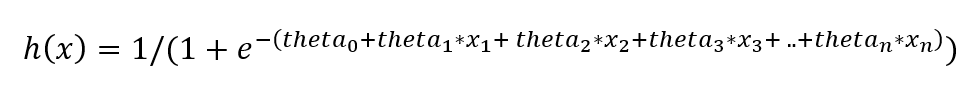
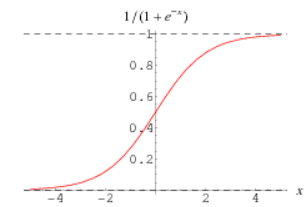

In [23]:
#### Describe - 1:
#### 用freq组数据fit ---- lrmodel_bal
from sklearn.linear_model import LogisticRegression
lrmodel_bal = LogisticRegression(class_weight='balanced')
lrmodel_bal.fit(X_train_freq, y_train)
#### 用freq组数据test ---- lrmodel_bal
lrmodel_bal.fit(X_test_freq, y_test)


print("Training set score: {:.3f}".format(lrmodel_bal.score(X_train_freq,y_train)))
print("Test set score: {:.3f}".format(lrmodel_bal.score(X_test_freq,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_freq)
result=logit_model.fit()
print(result.summary())

Training set score: 0.794
Test set score: 0.801
Optimization terminated successfully.
         Current function value: 0.639679
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32917
Method:                           MLE   Df Model:                           32
Date:                Thu, 05 Nov 2020   Pseudo R-squ.:                 -0.8171
Time:                        18:21:13   Log-Likelihood:                -21077.
converged:                       True   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0292      0.016     -1.774      0.076     